In [1]:
%load_ext autoreload
%autoreload 2

In [36]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
from tqdm import tqdm

In [37]:
from BlackJack import BlackJack

In [38]:
class Value:
    def __init__(self):
        self.vals=np.zeros((10,2,10))
        self.ns=np.zeros((10,2,10))

    def put(self,state,v):
        x,y,z=state.int_vals()
        self.ns[x][y][z]+=1.0
        self.vals[x][y][z]+= (v-self.vals[x][y][z])/self.ns[x][y][z]

    def get(self,state):
        return self.vals[x][y][z]


In [39]:
g=BlackJack()

In [40]:
vs=Value()
for i in tqdm(range(20000)):
    states=[]
    
    state,reward,done = g.reset()
    states.append(state)
    while not done and state.score<20:
        state,reward,done=g.step(1) # hit
        states.append(state)
    if not done:
        state,reward,done=g.step(0) # stick
        states.append(state)
    
    for s in reversed(states):
        if s.score <=21:
            vs.put(s,reward)
    

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [00:03<00:00, 6464.46it/s]


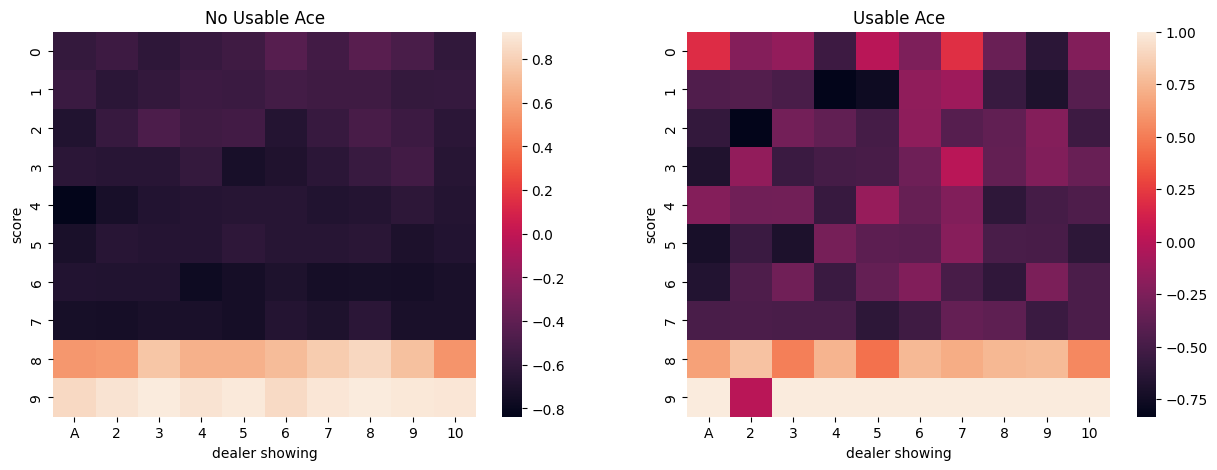

In [41]:
fig,axs=plt.subplots(1,2,figsize=(15,5))
sns.heatmap(vs.vals[:,0,:],ax=axs[0]),
sns.heatmap(vs.vals[:,1,:],ax=axs[1])

axs[0].set_xlabel('dealer showing')
axs[1].set_xlabel('dealer showing')

axs[0].set_ylabel('score')
axs[1].set_ylabel('score')

axs[0].set_title('No Usable Ace')
axs[1].set_title('Usable Ace')

axs[0].set_xticklabels(['A']+list(map(str,range(2,11))))
axs[1].set_xticklabels(['A']+list(map(str,range(2,11))))
plt.show()

In [42]:

for i in tqdm(range(20000,500000)):
    states=[]
    
    state,reward,done = g.reset()
    states.append(state)
    while not done and state.score<20:
        state,reward,done=g.step(1)
        states.append(state)
    if not done:
        state,reward,done=g.step(0)
        states.append(state)
    
    for s in reversed(states):
        if s.score <=21:
            vs.put(s,reward)
    

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 480000/480000 [01:57<00:00, 4079.61it/s]


In [43]:
state

BlackJackState(score=28, usable=False, dealer_showing='4')

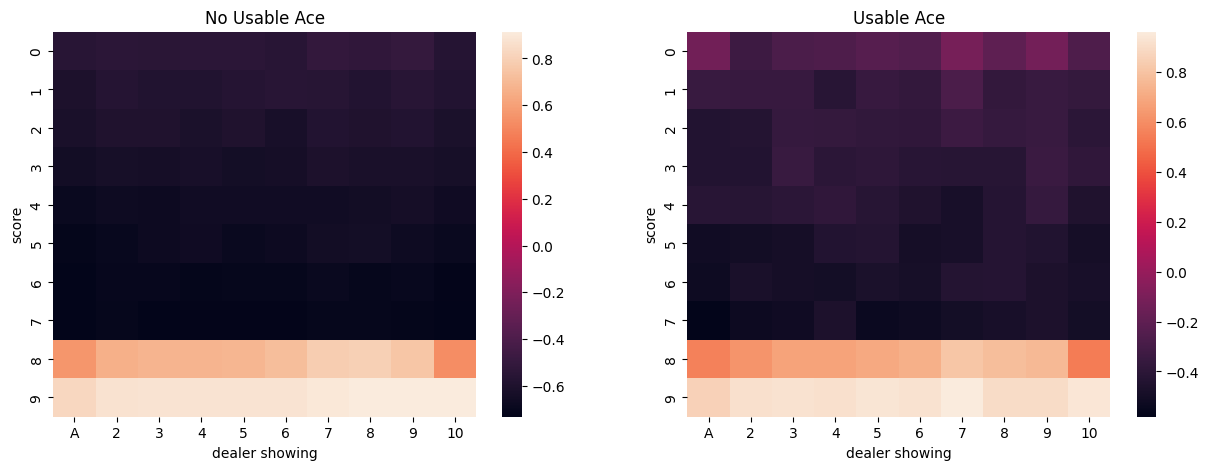

In [44]:
fig,axs=plt.subplots(1,2,figsize=(15,5))
sns.heatmap(vs.vals[:,0,:],ax=axs[0]),
sns.heatmap(vs.vals[:,1,:],ax=axs[1])

axs[0].set_xlabel('dealer showing')
axs[1].set_xlabel('dealer showing')

axs[0].set_ylabel('score')
axs[1].set_ylabel('score')

axs[0].set_title('No Usable Ace')
axs[1].set_title('Usable Ace')

axs[0].set_xticklabels(['A']+list(map(str,range(2,11))))
axs[1].set_xticklabels(['A']+list(map(str,range(2,11))))
plt.show()

In [45]:
class Q:
    def __init__(self):
        self.vals=np.random.normal(size=(10,2,10,2))
        self.cs=np.zeros((10,2,10,2))
        

    def put(self,state,action,w,g):
        x,y,z=state.int_vals()
        
        self.cs[x][y][z][action]+=w
        self.vals[x][y][z][action]+=w/self.cs[x][y][z][action]*(g-self.vals[x][y][z][action])

    def get(self,state):
        x,y,z=state.int_vals()
        return self.vals[x][y][z]


In [53]:
qs=Q()
for i in tqdm(range(2000000)):

    t=0
    states=[]
    actions=[]
    rewards=[]
    
    state,reward,done = g.reset()
    states.append(state)
    rewards.append(reward)

    while not done:
        action=np.random.choice([0,1])
        state,reward,done=g.step(action)
        actions.append(action)

        t+=1
        states.append(state)
        rewards.append(reward)

    G=0
    W=1
    T=t
    for t in range(T-1,-1,-1):
        
        s=states[t]
        a=actions[t]
        G+=rewards[t+1]
        qs.put(s,a,W,G)
        p=np.argmax(qs.get(s))
        if a==p:
            W=W*2
        else:
            break
        




100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000000/2000000 [05:32<00:00, 6008.48it/s]


Text(0.5, 1.0, 'Action - No Usable Ace')

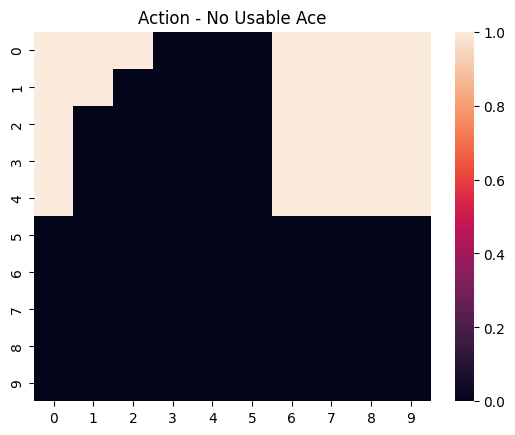

In [54]:
sns.heatmap(np.argmax(qs.vals[:,0],axis=2))
plt.title('Action - No Usable Ace')

Text(0.5, 1.0, 'Action - Usable Ace')

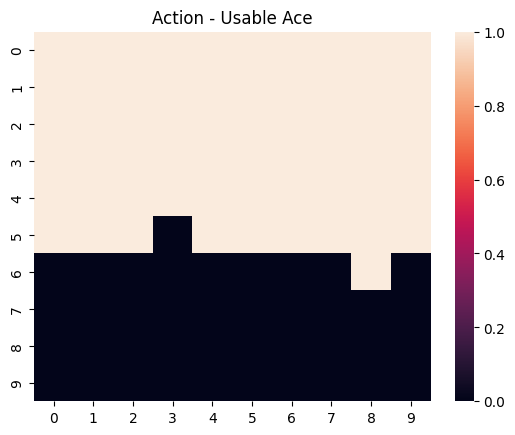

In [55]:
sns.heatmap(np.argmax(qs.vals[:,1],axis=2))
plt.title('Action - Usable Ace')

Text(0.5, 1.0, 'Value - No Usable Ace')

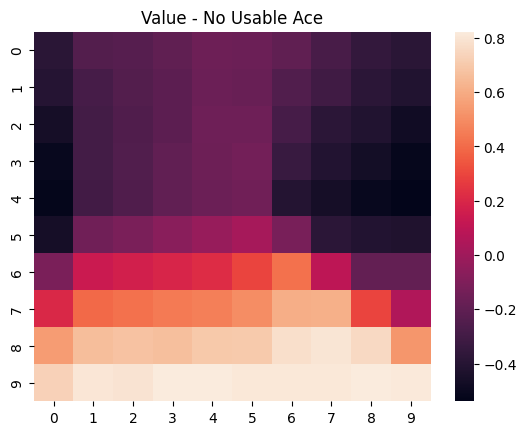

In [56]:
sns.heatmap(np.max(qs.vals[:,0],axis=2))
plt.title('Value - No Usable Ace')

Text(0.5, 1.0, 'Value - Usable Ace')

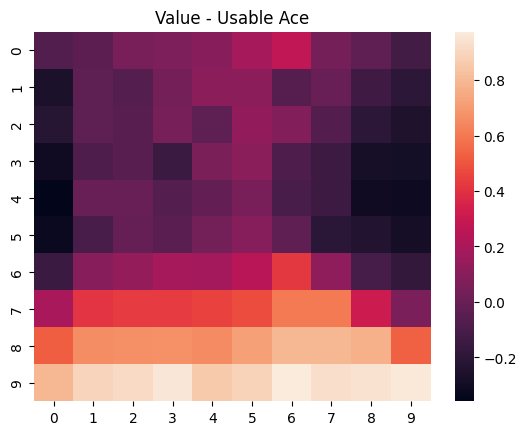

In [57]:
sns.heatmap(np.max(qs.vals[:,1],axis=2))
plt.title('Value - Usable Ace')